# Lecture 21 2018-10-30: Pandas

Dataframe manipulation, Pandas graphics

In [1]:
import pandas as pd
from pandas import Series, DataFrame   # use these so often, this can be helpful

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

## DataFrame manipulation

In [2]:
# create dataset to work with

test_df=DataFrame( 
   [  ['w1','d1',1,10],
      ['w1','d3',2,20],
      ['w2','d1',3,30],
      ['w2','d2',4,40],
      ['w2','d2',5,60],
      ], 
    columns=['week','day','v1','v2'],
    index=['zero', 'one', 'two', 'three', 'four']
   )

test_df

,week,day,v1,v2
zero,w1,d1,1,10
one,w1,d3,2,20
two,w2,d1,3,30
three,w2,d2,4,40
four,w2,d2,5,60


In [3]:
v_columns=test_df[['v1','v2']]
save_v_columns = v_columns # for later

### built-in arithmetic operations, just as in numpy

In [4]:
### column/row sums: create new columns, work on individual columns
v_columns.sum()
v_columns['v2_col_sums'] = v_columns['v2'].sum()
v_columns['cumulative_v2_sums'] = v_columns['v2'].cumsum()
v_columns['v2_col_products'] = v_columns['v2'].prod()
v_columns['v1+v2'] = v_columns[['v1', 'v2']].sum(axis=1) # "axis" makes sense here, not a Series
v_columns

C:\Users\Mengmeng\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,v1,v2,v2_col_sums,cumulative_v2_sums,v2_col_products,v1+v2
zero,1,10,160,10,14400000,11
one,2,20,160,30,14400000,22
two,3,30,160,60,14400000,33
three,4,40,160,100,14400000,44
four,5,60,160,160,14400000,65


In [5]:
v_columns.mean()
v_columns.std(axis=1)
v_columns.mean(axis=1)
v_columns.describe()

,v1,v2,v2_col_sums,cumulative_v2_sums,v2_col_products,v1+v2
count,5.000000,5.000000,5.0,5.000000,5.0,5.000000
mean,3.000000,32.000000,160.0,72.000000,14400000.0,35.000000
std,1.581139,19.235384,0.0,59.749477,0.0,20.796634
min,1.000000,10.000000,160.0,10.000000,14400000.0,11.000000
25%,2.000000,20.000000,160.0,30.000000,14400000.0,22.000000
50%,3.000000,30.000000,160.0,60.000000,14400000.0,33.000000
75%,4.000000,40.000000,160.0,100.000000,14400000.0,44.000000
max,5.000000,60.000000,160.0,160.000000,14400000.0,65.000000


In [6]:
# can be useful for transforming data (more later), and can use numpy operations
np.log(v_columns)
np.log2(v_columns)
np.sqrt(v_columns)

,v1,v2,v2_col_sums,cumulative_v2_sums,v2_col_products,v1+v2
zero,1.000000,3.162278,12.649111,3.162278,3794.733192,3.316625
one,1.414214,4.472136,12.649111,5.477226,3794.733192,4.690416
two,1.732051,5.477226,12.649111,7.745967,3794.733192,5.744563
three,2.000000,6.324555,12.649111,10.000000,3794.733192,6.633250
four,2.236068,7.745967,12.649111,12.649111,3794.733192,8.062258


To compute over *all* values, use *DataFrame.get_values()*. This converts a DataFrame into an *ndarray*. from there you can do anything you can do with an ndarray.

In [7]:
vals = v_columns.get_values()
print(vals)
vals.sum()
vals.cumsum()
vals.mean()
#vals.std()

[[       1       10      160       10 14400000       11]
 [       2       20      160       30 14400000       22]
 [       3       30      160       60 14400000       33]
 [       4       40      160      100 14400000       44]
 [       5       60      160      160 14400000       65]]


2400050.3333333335

### Scalar operations

work on entire DataFrame, just like with numpy

In [8]:
#refresh dataset
v_columns = save_v_columns # restore original values
v_columns

,v1,v2,v2_col_sums,cumulative_v2_sums,v2_col_products,v1+v2
zero,1,10,160,10,14400000,11
one,2,20,160,30,14400000,22
two,3,30,160,60,14400000,33
three,4,40,160,100,14400000,44
four,5,60,160,160,14400000,65


In [9]:
print(v_columns)
v_columns - 2
v_columns * 10
v_columns * v_columns
v_columns* np.pi

       v1  v2  v2_col_sums  cumulative_v2_sums  v2_col_products  v1+v2
zero    1  10          160                  10         14400000     11
one     2  20          160                  30         14400000     22
two     3  30          160                  60         14400000     33
three   4  40          160                 100         14400000     44
four    5  60          160                 160         14400000     65


,v1,v2,v2_col_sums,cumulative_v2_sums,v2_col_products,v1+v2
zero,3.141593,31.415927,502.654825,31.415927,4.523893e+07,34.557519
one,6.283185,62.831853,502.654825,94.247780,4.523893e+07,69.115038
two,9.424778,94.247780,502.654825,188.495559,4.523893e+07,103.672558
three,12.566371,125.663706,502.654825,314.159265,4.523893e+07,138.230077
four,15.707963,188.495559,502.654825,502.654825,4.523893e+07,204.203522


### binary operations (between DataFrames)

(maybe skip this?)

## Statistics on DataFrame 

       norm  norm_skewed       exp  exp_skewed
0 -0.389633     9.220733  0.117421    5.117421
1  2.703278    15.406557  2.044977    7.044977
2  0.144200    10.288400  0.542785    5.542785
3  0.661410    11.322820  2.622028    7.622028
4 -1.671543     6.656914  1.208053    6.208053


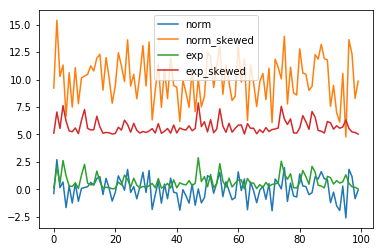

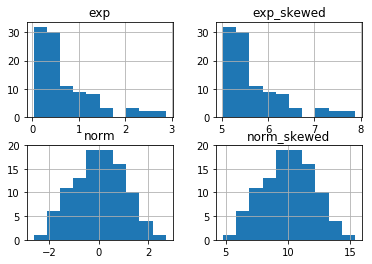

In [10]:
normal_dist = np.random.normal(0,size=100)
exp_dist = np.random.exponential(1/1.3,size=100)
rand_df = DataFrame( {'norm': normal_dist,
                      'norm_skewed': (normal_dist+5)*2,
                      'exp' : exp_dist, 
                      'exp_skewed' : (exp_dist+5)
                     }
                   )

print(rand_df.head())
h = rand_df.plot()
h = rand_df.hist() #column=['normal', 'normal_skewed', 'exponential', 'exp_skewed'], layout=(2,2))


In [21]:
rand_df.describe(include='all')

,exp,exp_skewed,norm,norm_skewed
count,100.000000,100.000000,100.000000,100.000000
mean,0.820517,5.820517,-0.283766,9.432468
std,0.811663,0.811663,0.927455,1.854909
min,0.010456,5.010456,-2.458762,5.082475
25%,0.197271,5.197271,-0.842986,8.314028
50%,0.544640,5.544640,-0.306520,9.386959
75%,1.340576,6.340576,0.304539,10.609078
max,4.294650,9.294650,2.018771,14.037541


In [11]:
# compute means
print(rand_df.head())
means = []
means.append(rand_df.mean())               # columnwise
means.append(rand_df.mean(axis=1))         # rowwise
means.append(rand_df.get_values().mean())   # mean of all numbers

print('\ncolumn means: \n{}\n\nrow means: \n{}\n\nOverall mean: \n{}'.format(
    means[0], means[1], means[2]))

       norm  norm_skewed       exp  exp_skewed
0 -0.389633     9.220733  0.117421    5.117421
1  2.703278    15.406557  2.044977    7.044977
2  0.144200    10.288400  0.542785    5.542785
3  0.661410    11.322820  2.622028    7.622028
4 -1.671543     6.656914  1.208053    6.208053

column means: 
norm            0.018645
norm_skewed    10.037289
exp             0.688368
exp_skewed      5.688368
dtype: float64

row means: 
0     3.516485
1     6.799947
2     4.129543
3     5.557071
4     3.100369
5     4.140963
6     2.931924
7     4.453146
8     2.958886
9     4.446182
10    5.003733
11    4.201318
12    4.422695
13    4.253187
14    5.312103
15    4.951902
16    3.442889
17    4.588202
18    3.884231
19    2.960723
20    3.577986
21    4.992524
22    4.412862
23    4.328388
24    5.557765
25    3.627905
26    4.433240
27    3.284596
28    3.973374
29    5.041584
        ...   
70    4.269326
71    2.499275
72    4.690545
73    4.453734
74    5.052691
75    5.930728
76    3.367730
77  

In [12]:
backup = rand_df
transformed_df = rand_df   # we will do some transformations on this
transformed_df.describe()

,norm,norm_skewed,exp,exp_skewed
count,100.000000,100.000000,100.000000,100.000000
mean,0.018645,10.037289,0.688368,5.688368
std,1.039148,2.078296,0.626599,0.626599
min,-2.612769,4.774463,0.025288,5.025288
25%,-0.720011,8.559977,0.216369,5.216369
50%,0.056299,10.112598,0.538555,5.538555
75%,0.688199,11.376399,0.923345,5.923345
max,2.703278,15.406557,2.876588,7.876588


In [13]:
transformed_df = backup
transformed_df.corr() # corrlation table

,norm,norm_skewed,exp,exp_skewed
norm,1.000000,1.000000,0.152617,0.152617
norm_skewed,1.000000,1.000000,0.152617,0.152617
exp,0.152617,0.152617,1.000000,1.000000
exp_skewed,0.152617,0.152617,1.000000,1.000000


,exp,exp_skewed,norm,norm_skewed,new_column_1,new_column_2
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.279279,8.279279,2.174996,11.891230,3.052515,57.164768
std,0.811663,0.811663,0.927455,1.854909,0.082798,12.186126
min,2.469218,7.469218,0.000000,7.541238,2.969880,29.769209
25%,2.656033,7.656033,1.615776,10.772790,2.988938,47.727607
50%,3.003402,8.003402,2.152242,11.845722,3.024373,56.463189
75%,3.799338,8.799338,2.763302,13.067841,3.105566,65.646111
max,6.753412,11.753412,4.477533,16.496303,3.406912,87.946402


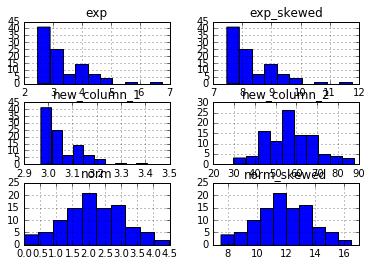

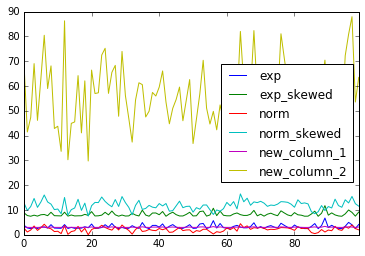

In [33]:


#transformed_df.drop(columns=['exp', 'norm'], inplace=True)

transformed_df['new_column_1'] = (transformed_df['exp_skewed'] * np.random.rand())
transformed_df['new_column_2'] = transformed_df['exp_skewed'] * transformed_df['norm_skewed']
transformed_df = transformed_df - transformed_df.get_values().min()  # note use of min()

h = transformed_df.hist()
h = transformed_df.plot()
transformed_df.describe()

In [34]:
transformed_df.corr()

,exp,exp_skewed,norm,norm_skewed,new_column_1,new_column_2
exp,1.000000,1.000000,-0.131389,-0.131389,1.000000,0.454043
exp_skewed,1.000000,1.000000,-0.131389,-0.131389,1.000000,0.454043
norm,-0.131389,-0.131389,1.000000,1.000000,-0.131389,0.815672
norm_skewed,-0.131389,-0.131389,1.000000,1.000000,-0.131389,0.815672
new_column_1,1.000000,1.000000,-0.131389,-0.131389,1.000000,0.454043
new_column_2,0.454043,0.454043,0.815672,0.815672,0.454043,1.000000


In [35]:
transformed_df.cov()

,exp,exp_skewed,norm,norm_skewed,new_column_1,new_column_2
exp,0.658797,0.658797,-0.098907,-0.197814,0.067204,4.490956
exp_skewed,0.658797,0.658797,-0.098907,-0.197814,0.067204,4.490956
norm,-0.098907,-0.098907,0.860172,1.720344,-0.010090,9.218789
norm_skewed,-0.197814,-0.197814,1.720344,3.440687,-0.020179,18.437577
new_column_1,0.067204,0.067204,-0.010090,-0.020179,0.006856,0.458124
new_column_2,4.490956,4.490956,9.218789,18.437577,0.458124,148.501671


In [41]:
transformed_df[['exp_skewed', 'new_column_1', 'new_column_2']].cov()

,exp_skewed,new_column_1,new_column_2
exp_skewed,0.658797,0.067204,4.490956
new_column_1,0.067204,0.006856,0.458124
new_column_2,4.490956,0.458124,148.501671


In [39]:
transformed_df.loc[:,['exp_skewed', 'new_column_1', 'new_column_2']].cov()

,exp_skewed,new_column_1,new_column_2
exp_skewed,0.658797,0.067204,4.490956
new_column_1,0.067204,0.006856,0.458124
new_column_2,4.490956,0.458124,148.501671


## Plotting data 

### plotting with Pandas

Pandas uses *matplotlib* under the hood. But working withing pandas is a good way to get quick and dirty plots that you can later make publication quality with *matplotlib* (or *seaborn* or equivalent)

We begin with plotting directly to a jupyter notebook within Pandas. Jupyter often defaults to in-line graphics rendering (meaning the pictures show up in your notebook). But some installations may not have this as the default. To assure in-line plotting is in place, use
>%matplotlib inline

Later we will go into details of matplotlib and show how to produce graphics files for publication.

(After you work through this section, go back and look at previous lectures that have plots in them.)

In [42]:
%matplotlib inline

In [50]:
!head microbiome_data.txt

patientID	Lactobacillus_crispatus	Lactobacillus_iners	Lactobacillus_gasseri	Lactobacillus_jensenii	Atopobium_vaginae	Megasphaera_sp._type_1	Streptococcus_anginosus	Prevotella_genogroup_3	Clostridiales	Enterococcus_faecalis	Corynebacterium_accolens	Total	Shannon	Simpson
 AYAC01 	0.4945164323392374	0.04614204651947973	0.0013938563779167972	0.0008314900243815879	0.09939048274723454	0.3235626455365195	2.529852256628213e-05	0.0018612471942309923	0.013861359522638336	7.309941520467836e-05	0.018342041800590122	23288	1.2489698918808638	2.764083921045238
 AYAC02 	0.6752256017633733	0.2841456786181501	0.0018426771758656062	0.03758653051563417	4.464617328552749e-05	0.0	2.9488086812927577e-05	0.0	0.0	0.0004452132882514228	0.0006801643786268412	40926	0.7726215979153231	1.8584348880097592
 AYAC03 	0.2988988574083742	0.3366439249686981	0.0008212921401808116	6.940735479047098e-05	0.1436266908783549	0.16132430355518462	0.000479428636078947	0.04400760052543568	0.004455985833629902	4.1363335539377896e-05

In [77]:
x=pd.read_csv('microbiome_data.txt', 
              comment='#', 
              sep='\t', 
              header=0,
              index_col=0
             )
print x.head()
# make useful sub-dataframes
x_abundances = x.iloc[:,:-3]
x_diversity = x.iloc[:,-3:]

x_diversity.head()

           Lactobacillus_crispatus  Lactobacillus_iners  \
patientID                                                 
 AYAC01                   0.494516             0.046142   
 AYAC02                   0.675226             0.284146   
 AYAC03                   0.298899             0.336644   
 AYAC04                   0.882867             0.091084   
 AYAC05                   0.001224             0.774687   

           Lactobacillus_gasseri  Lactobacillus_jensenii  Atopobium_vaginae  \
patientID                                                                     
 AYAC01                 0.001394                0.000831           0.099390   
 AYAC02                 0.001843                0.037587           0.000045   
 AYAC03                 0.000821                0.000069           0.143627   
 AYAC04                 0.004370                0.021186           0.000000   
 AYAC05                 0.001111                0.177701           0.000578   

           Megasphaera_sp._type_

,Total,Shannon,Simpson
patientID,,,
AYAC01,23288,1.248970,2.764084
AYAC02,40926,0.772622,1.858435
AYAC03,25299,1.521095,3.978104
AYAC04,35911,0.444000,1.268679
AYAC05,26537,0.704869,1.580368


The basic pandas plot method is *plot()*. Plot takes many possible parameters, some of the most useful are:

parameter | meaning
:-------- | :-----------
kind      | the kind of plot to produce. Default='line' makes line plots of columns
title     | title of the plot
layout    | (x,y) shows subplots in x by y array of plots
xlim      | (l,h) plots values on x axis ranging from l to h
ylim      | (l,h) plots values on y axis ranging from l to h
legend    | True or False show/hide legend



#### Line plots

the *pd.plot()* method produces line plots, one per column.

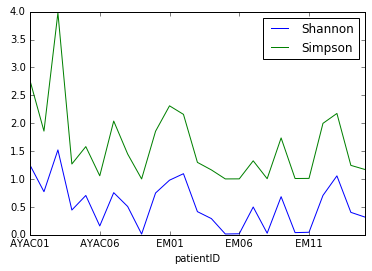

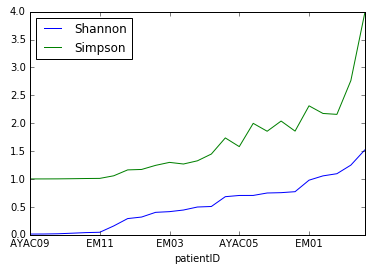

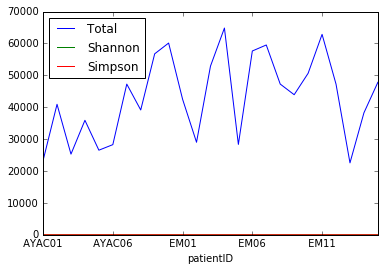

In [59]:
x_diversity[['Shannon','Simpson']].plot()
x_diversity[['Shannon','Simpson']].sort_values('Shannon').plot()
x_diversity.plot()

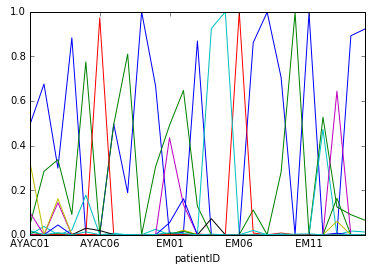

In [65]:
h = x_abundances.plot(legend=False) 

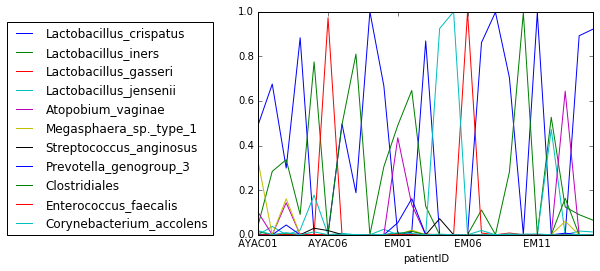

In [71]:
h = x_abundances.plot(legend=False)   #legend=False
#h.legend(loc = (1,0))
foo =h.legend(loc=(-0.75,0))   # we wll cover loc= when we talk about matplotlib

In [74]:
# remember, plot() is a method. Use it like one.
x_abundances.plot

*plot()* returns an *AxesSubplot* method, which we will discuss with matplotlib. 
To hide this in output, and get access to the methods in it, assign it to a value.

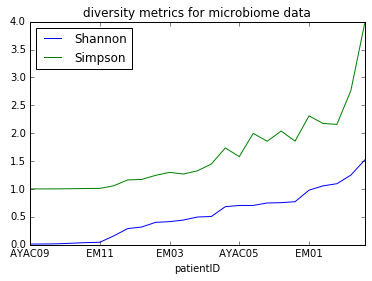

In [75]:
sp = x_diversity[['Shannon','Simpson']].sort_values('Shannon').plot(
    title='diversity metrics for microbiome data', 
)

*plot()* is the same as *plot(kind='line')*

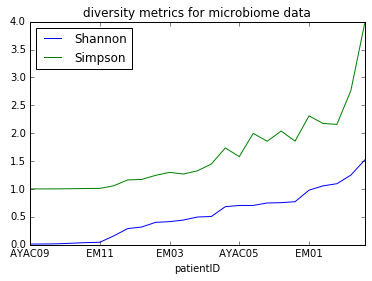

In [78]:
sp = x_diversity[['Shannon','Simpson']].sort_values('Shannon').plot(
    kind='line',
    title='diversity metrics for microbiome data', 
)

#### Bar plots
use
>plot.bar() 

and 

>plot.barh()

for big legends, you can pass through to matplotlib to use legend(loc=) to say where the legend should go. 
More on this later

*stacked=True* will stack the data from the colums, for each row.

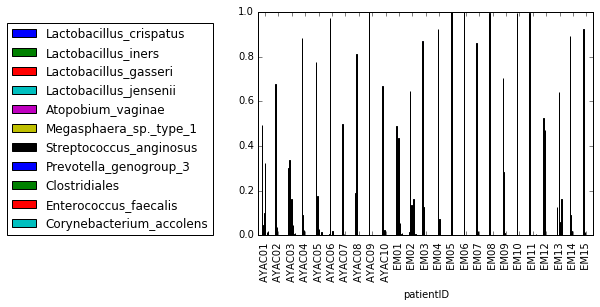

In [80]:
h = x_abundances.plot.bar(legend=False)
h.legend(loc=(-0.75,0))   # we wll cover loc= when we talk about matplotlib

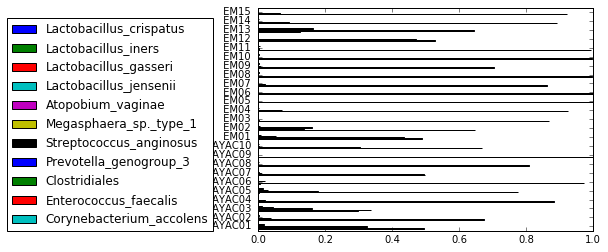

In [81]:
h = x_abundances.plot.barh(legend=False)
h.legend(loc=(-0.75,0))   # we wll cover loc= when we talk about matplotlib

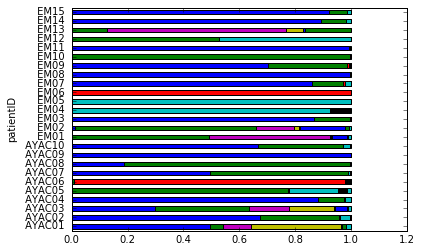

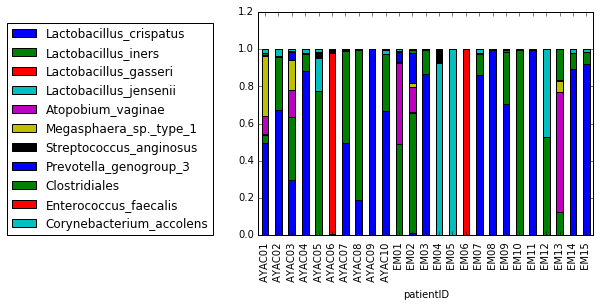

In [82]:
h = x_abundances.plot.barh(legend=False, stacked=True)
h = x_abundances.plot.bar(legend=False, stacked=True)

h.legend(loc=(-0.75,0))   # we wll cover loc= when we talk about matplotlib

#### Histograms

>plot.hist(bins=nn)

In [47]:
x_diversity.hist?

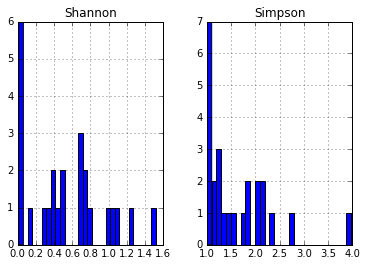

In [83]:
h = x_diversity[['Shannon','Simpson']].hist(bins=30)

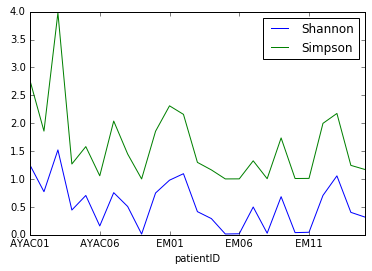

In [86]:
h = x_diversity[['Shannon','Simpson']].plot.density(title='Density distribution of diversity metrics')